<a href="https://colab.research.google.com/github/SophiaAlencar/LH_CD_SOPHIAALENCAR/blob/main/desafio_indi_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OBJETIVO: Análise exploratória dos dados

Bibliotecas e módulos auxiliares

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as pximport
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import nltk
import plotly.express as px

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [8]:
import nltk #processamento de linguagem natural
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from transformers import pipeline

nlp = spacy.load("en_core_web_sm")
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from textblob import TextBlob

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#FaZER UMA ÚNICA VEZ
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
!pip install nltk textblob scikit-learn

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [11]:
DataFrame = pd.read_csv('desafio_indicium_imdb.csv')

In [12]:
DataFrame.head(10)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
5,6,Pulp Fiction,1994,A,154 min,"Crime, Drama",8.9,"The lives of two mob hitmen, a boxer, a gangst...",94.0,Quentin Tarantino,John Travolta,Uma Thurman,Samuel L. Jackson,Bruce Willis,1826188,"107,928,762"
6,7,Schindler's List,1993,A,195 min,"Biography, Drama, History",8.9,"In German-occupied Poland during World War II,...",94.0,Steven Spielberg,Liam Neeson,Ralph Fiennes,Ben Kingsley,Caroline Goodall,1213505,"96,898,818"
7,8,Inception,2010,UA,148 min,"Action, Adventure, Sci-Fi",8.8,A thief who steals corporate secrets through t...,74.0,Christopher Nolan,Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot Page,Ken Watanabe,2067042,"292,576,195"
8,9,Fight Club,1999,A,139 min,Drama,8.8,An insomniac office worker and a devil-may-car...,66.0,David Fincher,Brad Pitt,Edward Norton,Meat Loaf,Zach Grenier,1854740,"37,030,102"
9,10,The Lord of the Rings: The Fellowship of the Ring,2001,U,178 min,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,"315,544,750"


In [13]:
DataFrame = DataFrame.drop(columns=['Unnamed: 0'])

In [14]:
DataFrame.isnull().sum()

,0
Series_Title,0
Released_Year,0
Certificate,101
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,157
Director,0
Star1,0


In [15]:
print(DataFrame['Released_Year'].unique())

['1972' '2008' '1974' '1957' '2003' '1994' '1993' '2010' '1999' '2001'
 '1966' '2002' '1990' '1980' '1975' '2020' '2019' '2014' '1998' '1997'
 '1995' '1991' '1977' '1962' '1954' '1946' '2011' '2006' '2000' '1988'
 '1985' '1968' '1960' '1942' '1936' '1931' '2018' '2017' '2016' '2012'
 '2009' '2007' '1984' '1981' '1979' '1971' '1963' '1964' '1950' '1940'
 '2013' '2005' '2004' '1992' '1987' '1986' '1983' '1976' '1973' '1965'
 '1959' '1958' '1952' '1948' '1944' '1941' '1927' '1921' '2015' '1996'
 '1989' '1978' '1961' '1955' '1953' '1925' '1924' '1982' '1967' '1951'
 '1949' '1939' '1937' '1934' '1928' '1926' '1920' '1970' '1969' '1956'
 '1947' '1945' '1930' '1938' '1935' '1933' '1932' '1922' '1943' 'PG']


In [16]:
DataFrame.query('Released_Year == "PG"')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
965,Apollo 13,PG,U,140 min,"Adventure, Drama, History",7.6,NASA must devise a strategy to return Apollo 1...,77.0,Ron Howard,Tom Hanks,Bill Paxton,Kevin Bacon,Gary Sinise,269197,"173,837,933"


In [18]:
DataFrame = DataFrame[DataFrame['Released_Year'] != 'PG'] #único dado "errado", então fui atrás para colocar o ano corretamente

In [19]:
print(DataFrame['Runtime'].unique())

['175 min' '152 min' '202 min' '96 min' '201 min' '154 min' '195 min'
 '148 min' '139 min' '178 min' '142 min' '161 min' '179 min' '136 min'
 '146 min' '124 min' '133 min' '160 min' '132 min' '153 min' '169 min'
 '130 min' '125 min' '189 min' '116 min' '127 min' '118 min' '121 min'
 '207 min' '122 min' '106 min' '112 min' '151 min' '150 min' '155 min'
 '119 min' '110 min' '88 min' '137 min' '89 min' '165 min' '109 min'
 '102 min' '87 min' '126 min' '147 min' '117 min' '181 min' '149 min'
 '105 min' '164 min' '170 min' '98 min' '101 min' '113 min' '134 min'
 '229 min' '115 min' '143 min' '95 min' '104 min' '123 min' '131 min'
 '108 min' '81 min' '99 min' '114 min' '129 min' '228 min' '128 min'
 '103 min' '107 min' '68 min' '138 min' '156 min' '167 min' '163 min'
 '186 min' '321 min' '135 min' '140 min' '180 min' '158 min' '210 min'
 '86 min' '162 min' '177 min' '204 min' '91 min' '172 min' '45 min'
 '145 min' '100 min' '196 min' '93 min' '120 min' '92 min' '144 min'
 '80 min' '183 min' 

In [20]:
DataFrame['Runtime'] = DataFrame['Runtime'].str.replace(' min', '', regex=False).astype(int) #tira o min e transforma em inteiro

In [21]:
print(DataFrame['Meta_score'].unique())

[100.  84.  90.  96.  94.  74.  66.  92.  82.  87.  73.  83.  nan  79.
  91.  61.  59.  65.  85.  98.  89.  88.  57.  67.  62.  77.  64.  75.
  80.  97.  99.  78.  68.  81.  95.  76.  69.  55.  70.  58.  86.  71.
  63.  93.  72.  60.  47.  49.  50.  33.  54.  56.  51.  53.  48.  44.
  45.  40.  52.  28.  36.  46.  30.  41.]


In [22]:
DataFrame['Meta_score'] = DataFrame['Meta_score'].fillna(0)
#pra indicar ausencia

In [23]:
print(DataFrame['Certificate'].unique())

['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'Unrated' 'GP' 'Approved' 'TV-PG' 'U/A']


In [24]:
DataFrame['Certificate'] = DataFrame['Certificate'].fillna('Unrated')

In [25]:
DataFrame.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


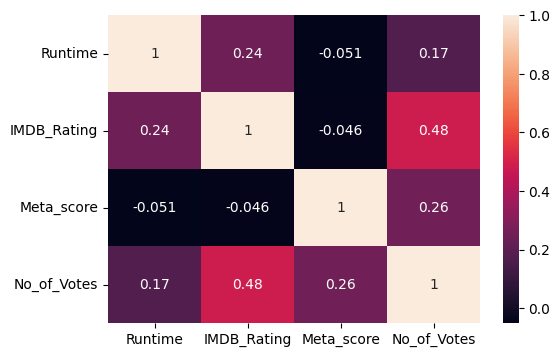

In [26]:
#matriz de correlação (coloridinha) heatmap

corr = DataFrame.corr(numeric_only=True)
features = corr.index
plt.figure(figsize=(6,4))
ax = sns.heatmap(DataFrame[features].corr(),annot=True)

In [27]:
DataFrame.describe()

,Runtime,IMDB_Rating,Meta_score,No_of_Votes
count,998.000000,998.000000,998.000000,9.980000e+02
mean,122.854709,7.948297,65.704409,2.716239e+05
std,28.110078,0.272203,30.595425,3.210735e+05
min,45.000000,7.600000,0.000000,2.508800e+04
25%,103.000000,7.700000,63.000000,5.541675e+04
50%,119.000000,7.900000,76.000000,1.381685e+05
75%,136.750000,8.100000,85.750000,3.735062e+05
max,321.000000,9.200000,100.000000,2.303232e+06


In [28]:
DataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 998 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   998 non-null    object 
 1   Released_Year  998 non-null    object 
 2   Certificate    998 non-null    object 
 3   Runtime        998 non-null    int64  
 4   Genre          998 non-null    object 
 5   IMDB_Rating    998 non-null    float64
 6   Overview       998 non-null    object 
 7   Meta_score     998 non-null    float64
 8   Director       998 non-null    object 
 9   Star1          998 non-null    object 
 10  Star2          998 non-null    object 
 11  Star3          998 non-null    object 
 12  Star4          998 non-null    object 
 13  No_of_Votes    998 non-null    int64  
 14  Gross          829 non-null    object 
dtypes: float64(2), int64(2), object(11)
memory usage: 157.0+ KB


In [29]:
DataFrame.query('IMDB_Rating > 8.5 and Certificate == "U"')

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
3,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"
9,The Lord of the Rings: The Fellowship of the Ring,2001,U,178,"Action, Adventure, Drama",8.8,A meek Hobbit from the Shire and eight compani...,92.0,Peter Jackson,Elijah Wood,Ian McKellen,Orlando Bloom,Sean Bean,1661481,"315,544,750"
19,Soorarai Pottru,2020,U,153,Drama,8.6,"Nedumaaran Rajangam ""Maara"" sets out to make t...",0.0,Sudha Kongara,Suriya,Madhavan,Paresh Rawal,Aparna Balamurali,54995,NaN
22,Sen to Chihiro no kamikakushi,2001,U,125,"Animation, Adventure, Family",8.6,"During her family's move to the suburbs, a sul...",96.0,Hayao Miyazaki,Daveigh Chase,Suzanne Pleshette,Miyu Irino,Rumi Hiiragi,651376,"10,055,859"
25,La vita è bella,1997,U,116,"Comedy, Drama, Romance",8.6,When an open-minded Jewish librarian and his s...,59.0,Roberto Benigni,Roberto Benigni,Nicoletta Braschi,Giorgio Cantarini,Giustino Durano,623629,"57,598,247"
30,Shichinin no samurai,1954,U,207,"Action, Adventure, Drama",8.6,A poor village under attack by bandits recruit...,98.0,Akira Kurosawa,Toshirô Mifune,Takashi Shimura,Keiko Tsushima,Yukiko Shimazaki,315744,"269,061"


In [30]:
print(DataFrame['Certificate'].unique())

['A' 'UA' 'U' 'PG-13' 'R' 'Unrated' 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA'
 'GP' 'Approved' 'TV-PG' 'U/A']


In [31]:
valores_distintos = []
for i in DataFrame.columns[0:16].tolist():
  print(i,':',len(DataFrame[i].astype(str).value_counts()))
  valores_distintos.append(len(DataFrame[i].astype(str).value_counts()))

Series_Title : 997
Released_Year : 99
Certificate : 16
Runtime : 140
Genre : 202
IMDB_Rating : 16
Overview : 998
Meta_score : 64
Director : 548
Star1 : 659
Star2 : 839
Star3 : 890
Star4 : 937
No_of_Votes : 997
Gross : 822


In [32]:
#sunburst
def melhores_filmes(DataFrame, color_scale="Blues"):
    DF_sorted = DataFrame.sort_values(by='IMDB_Rating', ascending=False)
    top10 = DF_sorted.head(10)

    #gráfico
    fig = px.sunburst(
        top10,
        path=['Genre', 'Series_Title'],  #hierarquia 1: genero; 2: titulo
        values='IMDB_Rating',
        color='IMDB_Rating',
        color_continuous_scale=color_scale,
        title="Top 10 highest rated films by genre"
    )
    fig.update_layout(width=900, height=900)
    fig.show()
#chamando a função
melhores_filmes(DataFrame, color_scale="viridis")



# NUVEM DE PALAVRAS

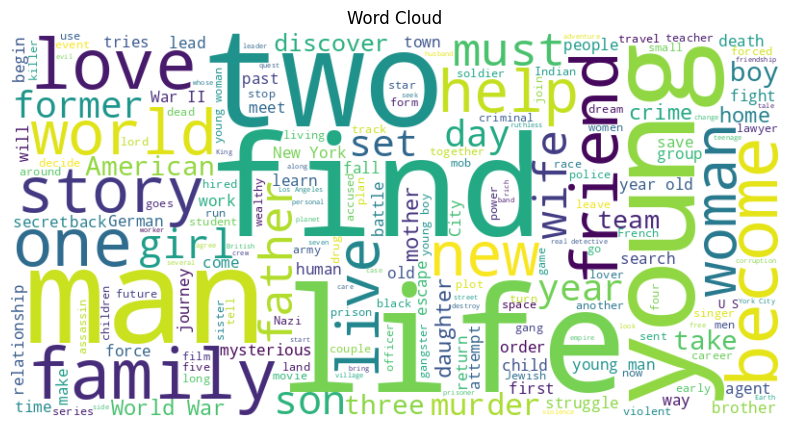

In [33]:
from wordcloud import WordCloud

#junta todos os textos em uma única string
texto = ' '.join(DataFrame['Overview'].astype(str))

#nuvem
nuvem = WordCloud(
    background_color='white',
    width=800,
    height=400,
    colormap='viridis'
).generate(texto)

#exibição
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.imshow(nuvem, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud")
plt.show()

## PROCESSAMENTO DE GROSS

In [34]:
#remover o símbolo de vírgulas e converter para float
DataFrame['Gross'] = DataFrame['Gross'].str.replace(',', '', regex=False)
DataFrame['Gross'] = DataFrame['Gross'].astype(float)

#conversão
print(DataFrame['Gross'].head())
print(DataFrame['Gross'].dtype)

0    134966411.0
1    534858444.0
2     57300000.0
3      4360000.0
4    377845905.0
Name: Gross, dtype: float64
float64


In [35]:
#média ignorando NaN
mean_gross = DataFrame['Gross'].mean()
#preencher os NaN com a média
DataFrame['Gross'] = DataFrame['Gross'].fillna(mean_gross)

In [36]:
DataFrame.isnull().sum()

,0
Series_Title,0
Released_Year,0
Certificate,0
Runtime,0
Genre,0
IMDB_Rating,0
Overview,0
Meta_score,0
Director,0
Star1,0


BOXPLOT PARA RESPONDER A QUESTÃO DO FATURAMENTO

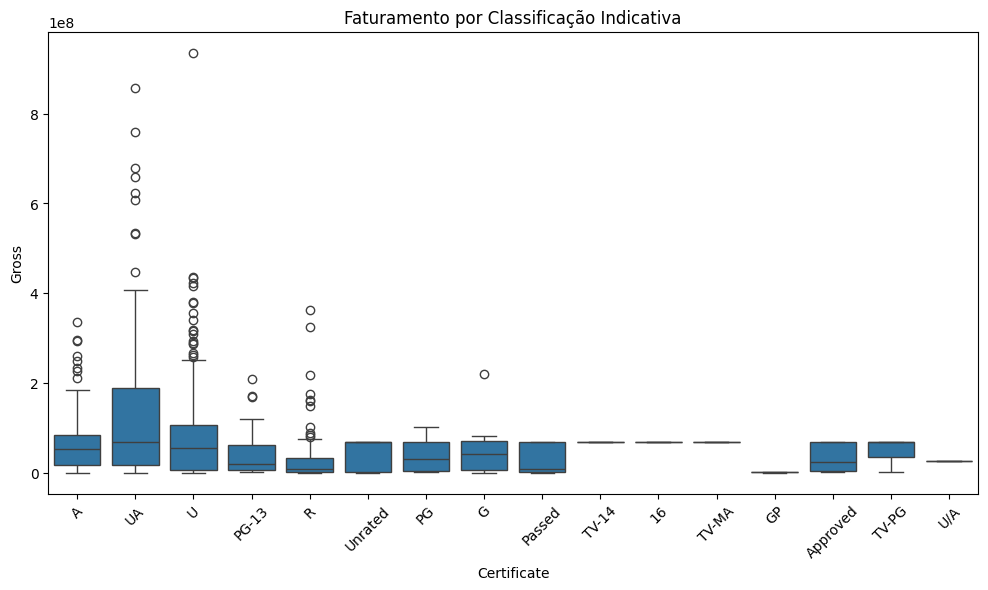

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=DataFrame, x='Certificate', y='Gross')
plt.title('Faturamento por Classificação Indicativa')
plt.xticks(rotation=45)
plt.show()

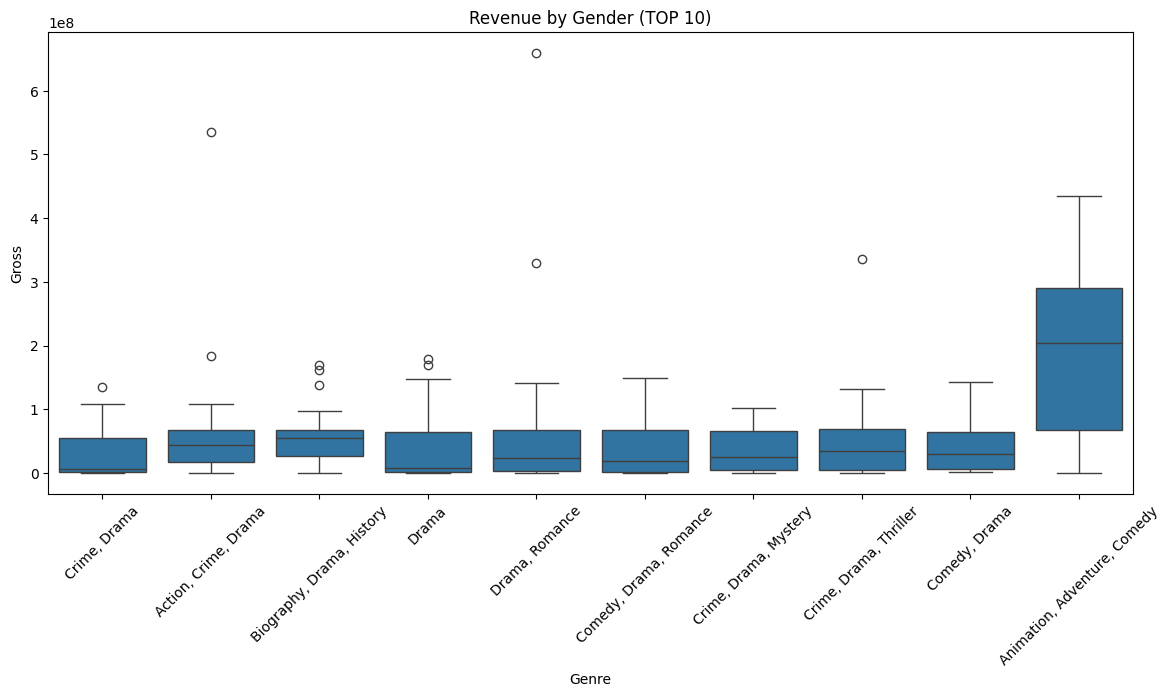

In [ ]:
#frequência dos gêneros e pegar os top N
top_genres = DataFrame['Genre'].value_counts().head(10).index
#filtro
df_top_genres = DataFrame[DataFrame['Genre'].isin(top_genres)]

#boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_genres, x='Genre', y='Gross')
plt.title('Revenue by Gender (TOP 10)')
plt.xticks(rotation=45)
plt.show()

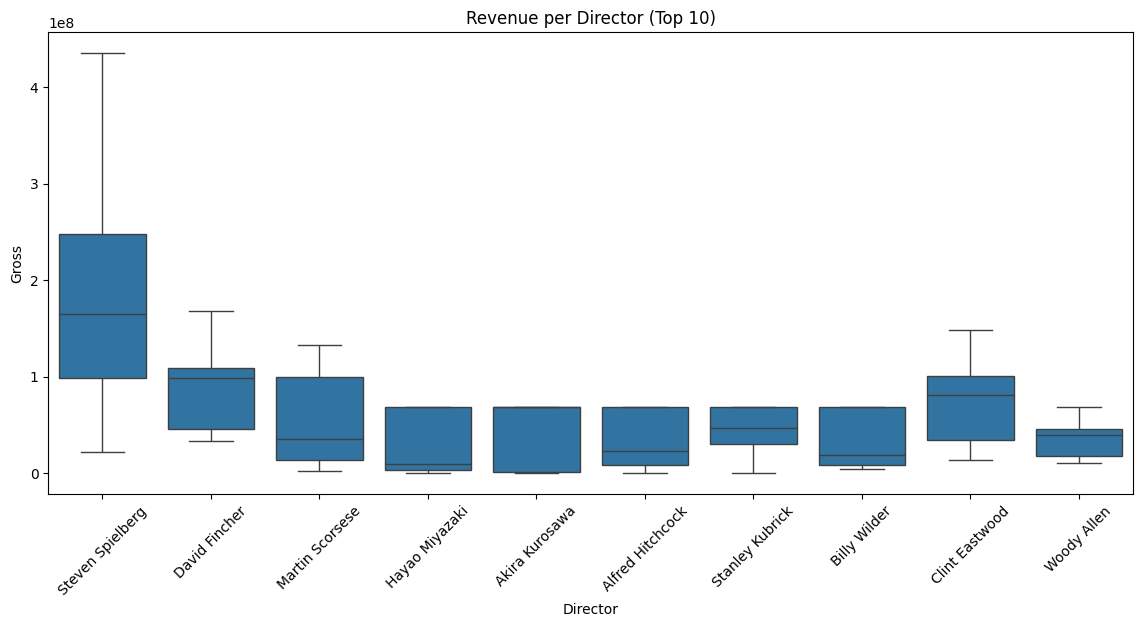

In [ ]:
#Top 10 diretores com mais filmes
top_directors = DataFrame['Director'].value_counts().head(10).index
#filtro
df_top_directors = DataFrame[DataFrame['Director'].isin(top_directors)]

#boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_directors, x='Director', y='Gross')
plt.title('Revenue per Director (Top 10)')
plt.xticks(rotation=45)
plt.show()

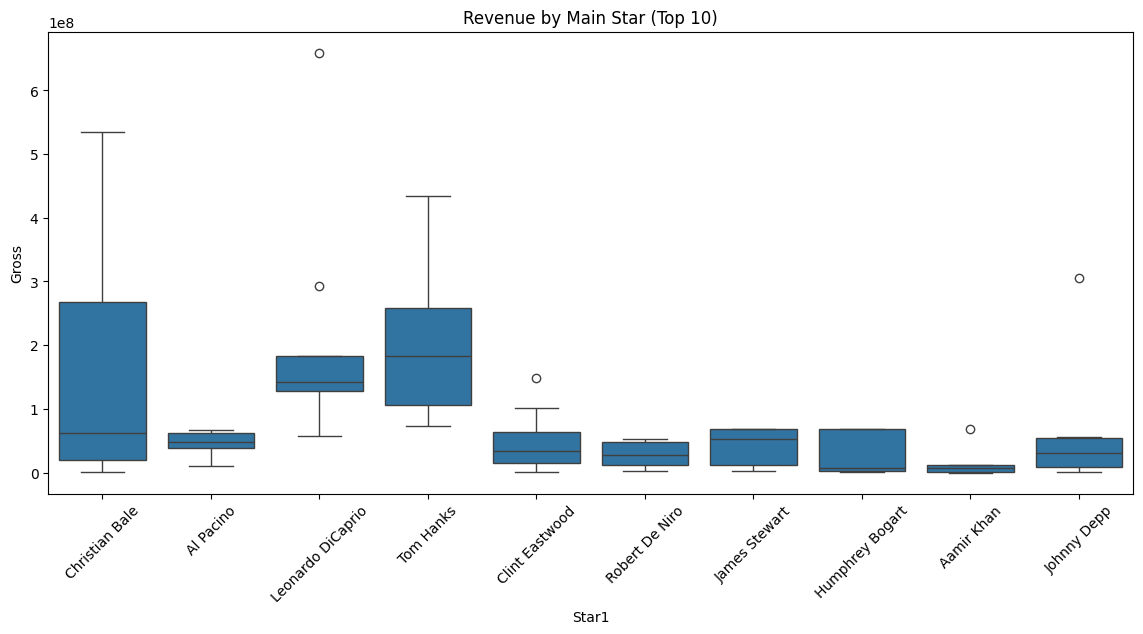

In [ ]:
#Top 10 estrelas
top_stars = DataFrame['Star1'].value_counts().head(10).index
#filtro
df_top_stars = DataFrame[DataFrame['Star1'].isin(top_stars)]

#boxplot
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_stars, x='Star1', y='Gross')
plt.title('Revenue by Main Star (Top 10)')
plt.xticks(rotation=45)
plt.show()

In [37]:
text_series = DataFrame['Overview'].dropna().copy() #linhas com sinopse faltante

#pré-processamento
def clean_text(text):
    text = text.lower()
    #pontuação
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    #tokenização
    words = text.split()
    #remoção stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    #Lematização
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    #juntar tudo
    return ' '.join(words)

#aplicar função
DataFrame['cleaned_overview'] = DataFrame['Overview'].apply(lambda x: clean_text(str(x)))

In [38]:
#extracao de features
#polaridade do sentimento (-1 a 1)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

#No texto limpo
DataFrame['sentiment_polarity'] = DataFrame['cleaned_overview'].apply(get_sentiment)
correlation = DataFrame[['Gross', 'sentiment_polarity']].corr()
print(correlation.loc['Gross', 'sentiment_polarity'])

0.002080386844616425


In [39]:
#palavras por sinopse
DataFrame['overview_word_count'] = DataFrame['cleaned_overview'].apply(lambda x: len(x.split()))

#caracteres por sinopse
DataFrame['overview_length'] = DataFrame['cleaned_overview'].apply(len)

#correlações
print(DataFrame[['Gross', 'overview_word_count', 'overview_length']].corr()['Gross'])

Gross                  1.000000
overview_word_count    0.120322
overview_length        0.102409
Name: Gross, dtype: float64


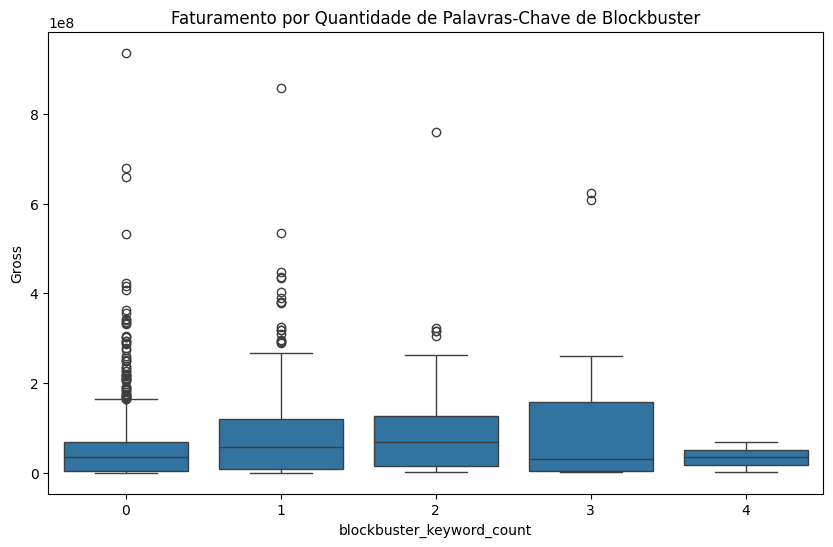

In [40]:
#lista de palavras-chave associadas a blockbusters
blockbuster_keywords = ['world', 'save', 'mission', 'secret', 'hero', 'battle', 'team', 'quest', 'adventure', 'war', 'planet', 'power', 'legend', 'journey', 'fight']

#contar quantas palavras aparecem em cada sinopse
def count_keywords(text):
    words = text.split()
    return sum(1 for word in words if word in blockbuster_keywords)

DataFrame['blockbuster_keyword_count'] = DataFrame['cleaned_overview'].apply(count_keywords)

plt.figure(figsize=(10, 6))
sns.boxplot(data=DataFrame, x='blockbuster_keyword_count', y='Gross')
plt.title('Faturamento por Quantidade de Palavras-Chave de Blockbuster')
plt.show()

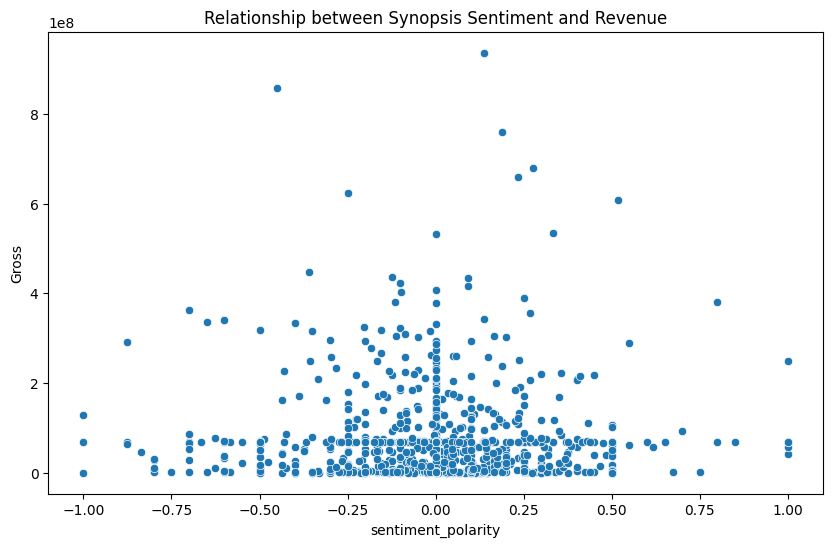

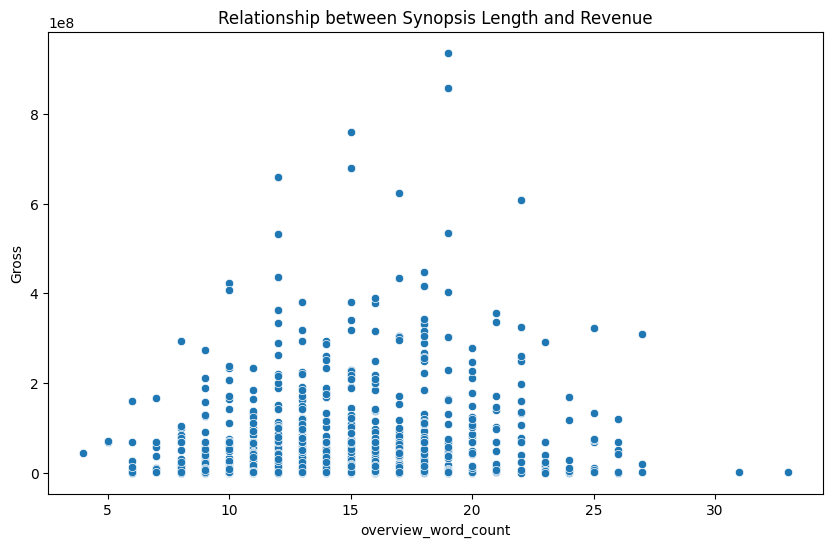

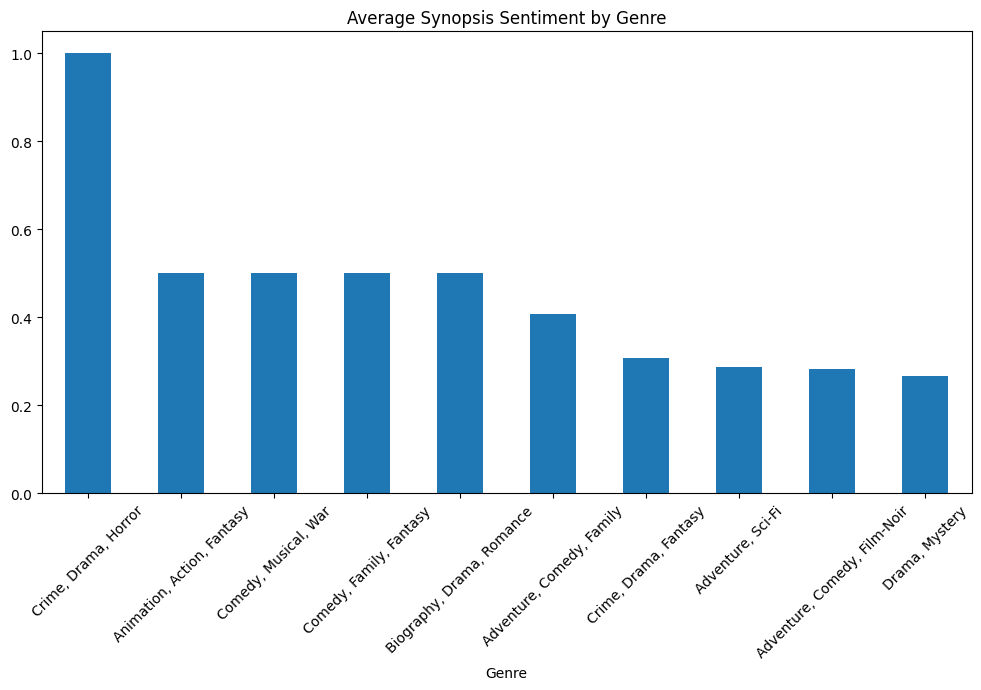

In [41]:
#sentimento e faturamento
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DataFrame, x='sentiment_polarity', y='Gross')
plt.title('Relationship between Synopsis Sentiment and Revenue')
plt.show()

#num. de palavras vs faturamento
plt.figure(figsize=(10, 6))
sns.scatterplot(data=DataFrame, x='overview_word_count', y='Gross')
plt.title('Relationship between Synopsis Length and Revenue')
plt.show()

#comparar sentimentos medios por gênero
plt.figure(figsize=(12, 6))
sentiment_by_genre = DataFrame.groupby('Genre')['sentiment_polarity'].mean().sort_values(ascending=False)
sentiment_by_genre.head(10).plot(kind='bar')
plt.title('Average Synopsis Sentiment by Genre')
plt.xticks(rotation=45)
plt.show()